In [6]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [7]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

In [9]:
xr.shape, yr.shape, xt.shape, yt.shape
#每個的形狀 因為y的都是label所以就一維

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
x= xr[0]

for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

    #顯示出第一張的樣子(因為是xr[0])

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

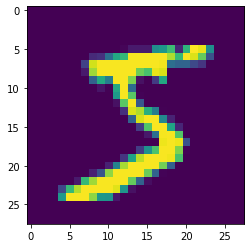

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x)

In [18]:
y= yr[0]
print(f'y={y}')
#{}裡面的是format的東西，' '內的會直接輸出

y=5


In [19]:
xr1= xr.reshape(-1, 28*28) 
xt1= xt.reshape(-1, 28*28) 

In [20]:
xr1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100),    
    keras.layers.Dense(10)   
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

In [22]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 2.8226 - accuracy: 0.1054
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3040 - accuracy: 0.1193
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3040 - accuracy: 0.1193
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3040 - accuracy: 0.1193
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3040 - accuracy: 0.1193
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3040 - accuracy: 0.1193
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3040 - accuracy: 0.1193
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3040 - accuracy: 0.1193
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3040 - accuracy: 0.1193
Epoch 10/10
313/313 [==============================] - 0s 911us/step - loss: 2.3067 - accuracy: 0.11

[2.3067355155944824, 0.1168999969959259]

In [25]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'sigmoid'),    
    keras.layers.Dense(10)   
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 2.2240 - accuracy: 0.2130
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 2.1764 - accuracy: 0.2033
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 2.2482 - accuracy: 0.1937
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 2.2255 - accuracy: 0.2134
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 2.2481 - accuracy: 0.2642
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 2.2709 - accuracy: 0.2774
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 2.2729 - accuracy: 0.2883
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3029 - accuracy: 0.2828
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 2.3026 - accuracy: 0.2798
Epoch 10/10
313/313 [==============================] - 0s 893us/step - loss: 2.3026 - accuracy: 0.28

[2.30259108543396, 0.2815999984741211]

In [28]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(100, activation = 'relu')   
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 14.8979 - accuracy: 0.0026
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 14.5456 - accuracy: 0.0101
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 14.3501 - accuracy: 0.0104
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 14.5367 - accuracy: 0.0041
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 14.4275 - accuracy: 0.0040
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 14.4301 - accuracy: 0.0058
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 14.3006 - accuracy: 0.0102
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 14.0375 - accuracy: 0.0182
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 14.0809 - accuracy: 0.0218
Epoch 10/10
313/313 [==============================] - 0s 960us/step - loss: 13.1852 - accu

[13.185150146484375, 0.01360000018030405]

In [29]:
xr1= xr.reshape(-1,28*28) /255
xt1= xt.reshape(-1,28*28) /255


In [31]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(200, activation= 'relu'),    
    keras.layers.Dense(100, activation = 'relu')   
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 4.5446 - accuracy: 0.1332
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 4.4064 - accuracy: 0.1435
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 4.4139 - accuracy: 0.1411
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 4.4126 - accuracy: 0.1413
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 4.3670 - accuracy: 0.1517
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 4.3720 - accuracy: 0.1503
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 4.3822 - accuracy: 0.1480
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 4.3792 - accuracy: 0.1489
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 4.3404 - accuracy: 0.1574
Epoch 10/10
313/313 [==============================] - 0s 990us/step - loss: 4.4516 - accuracy: 0.13

[4.451596736907959, 0.1316000074148178]

In [34]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu')  
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 6000)

aModel.evaluate(xt1, yt)
#把batchsize調大，訓練的數據變多，正確率上升

Epoch 1/10
10/10 [==============================] - 1s 22ms/step - loss: 5.3045 - accuracy: 0.3246
Epoch 2/10
10/10 [==============================] - 0s 23ms/step - loss: 1.4784 - accuracy: 0.6576
Epoch 3/10
10/10 [==============================] - 0s 23ms/step - loss: 1.1241 - accuracy: 0.7648
Epoch 4/10
10/10 [==============================] - 0s 22ms/step - loss: 0.8586 - accuracy: 0.8358
Epoch 5/10
10/10 [==============================] - 0s 21ms/step - loss: 0.8822 - accuracy: 0.7907
Epoch 6/10
10/10 [==============================] - 0s 21ms/step - loss: 0.7100 - accuracy: 0.8496
Epoch 7/10
10/10 [==============================] - 0s 23ms/step - loss: 0.6593 - accuracy: 0.8703
Epoch 8/10
10/10 [==============================] - 0s 23ms/step - loss: 0.6777 - accuracy: 0.8648
Epoch 9/10
10/10 [==============================] - 0s 22ms/step - loss: 0.6864 - accuracy: 0.8547
Epoch 10/10
313/313 [==============================] - 0s 967us/step - loss: 0.5688 - accuracy: 0.9096


[0.5687856674194336, 0.909600019454956]

In [41]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
    ])   
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 6000)

aModel.evaluate(xt1, yt)
#把batchsize調大，訓練的數據變多，正確率上升

Epoch 1/10
10/10 [==============================] - 1s 15ms/step - loss: 1.5269 - accuracy: 0.5831
Epoch 2/10
10/10 [==============================] - 0s 15ms/step - loss: 0.7154 - accuracy: 0.8257
Epoch 3/10
10/10 [==============================] - 0s 15ms/step - loss: 0.5104 - accuracy: 0.8646
Epoch 4/10
10/10 [==============================] - 0s 15ms/step - loss: 0.4270 - accuracy: 0.8840
Epoch 5/10
10/10 [==============================] - 0s 17ms/step - loss: 0.3596 - accuracy: 0.9021
Epoch 6/10
10/10 [==============================] - 0s 16ms/step - loss: 0.3342 - accuracy: 0.9036
Epoch 7/10
10/10 [==============================] - 0s 16ms/step - loss: 0.3071 - accuracy: 0.9128
Epoch 8/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2846 - accuracy: 0.9167
Epoch 9/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2688 - accuracy: 0.9227
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.2308 - accuracy: 0.9337


[0.23081298172473907, 0.9337000250816345]

In [43]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
    ])   
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 6000)

aModel.evaluate(xt1, yt)
#把batchsize調大，訓練的數據變多，正確率上升
#層數可以由大排到小，通常是用relu和softmax

Epoch 1/10
10/10 [==============================] - 1s 15ms/step - loss: 1.5137 - accuracy: 0.6140
Epoch 2/10
10/10 [==============================] - 0s 15ms/step - loss: 0.7167 - accuracy: 0.8235
Epoch 3/10
10/10 [==============================] - 0s 15ms/step - loss: 0.5090 - accuracy: 0.8680
Epoch 4/10
10/10 [==============================] - 0s 15ms/step - loss: 0.4251 - accuracy: 0.8808
Epoch 5/10
10/10 [==============================] - 0s 15ms/step - loss: 0.3616 - accuracy: 0.9000
Epoch 6/10
10/10 [==============================] - 0s 17ms/step - loss: 0.3338 - accuracy: 0.9045
Epoch 7/10
10/10 [==============================] - 0s 16ms/step - loss: 0.3009 - accuracy: 0.9148
Epoch 8/10
10/10 [==============================] - 0s 15ms/step - loss: 0.2822 - accuracy: 0.9193
Epoch 9/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2595 - accuracy: 0.9255
Epoch 10/10
313/313 [==============================] - 0s 982us/step - loss: 0.2408 - accuracy: 0.9288


[0.2408134490251541, 0.9287999868392944]

In [48]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
    ])   
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)
#層數可以由大排到小，通常是用relu和softmax

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3011 - accuracy: 0.9149
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1284 - accuracy: 0.9617
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0908 - accuracy: 0.9725
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0707 - accuracy: 0.9783
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0584 - accuracy: 0.9820
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0462 - accuracy: 0.9859
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0399 - accuracy: 0.9876
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0328 - accuracy: 0.9898
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 10/10
313/313 [==============================] - 0s 908us/step - loss: 0.0979 - accuracy: 0.97

[0.09790939092636108, 0.9768000245094299]

In [49]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
    ])   
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 50)

aModel.evaluate(xt1, yt)
#層數可以由大排到小，通常是用relu和softmax

Epoch 1/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2601 - accuracy: 0.9238
Epoch 2/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.1116 - accuracy: 0.9664
Epoch 3/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0801 - accuracy: 0.9757
Epoch 4/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0644 - accuracy: 0.9805
Epoch 5/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0532 - accuracy: 0.9843
Epoch 6/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0438 - accuracy: 0.9871
Epoch 7/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0386 - accuracy: 0.9885
Epoch 8/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 9/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 10/10
313/313 [==============================] - 0s 930us/step - loss: 0.102

[0.10217916965484619, 0.9769999980926514]

In [50]:
aModel.summary() #可以看到模型的各層組成

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 100)               78500     
                                                                 
 dense_67 (Dense)            (None, 100)               10100     
                                                                 
 dense_68 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
